#### Insights to draw:
- How likely is it for a patient to have diabetes based on the data provided?
- what combination of these features shows that a patient will have diabetes

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data = df.copy()

In [5]:
data.shape

(768, 9)

In [6]:
pd.isnull(data).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


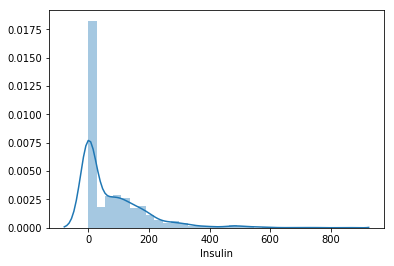

In [9]:
sns.distplot(data['Insulin'])

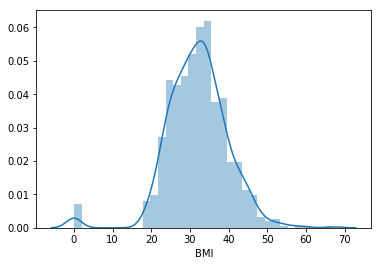

In [10]:
sns.distplot(data['BMI'])

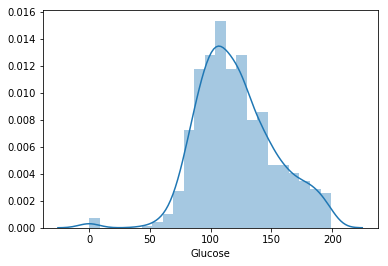

In [11]:
sns.distplot(data['Glucose'])

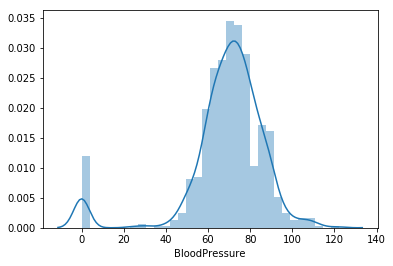

In [12]:
sns.distplot(data['BloodPressure'])

In [13]:
#looking at the four graphs above we see that they all bein at zero, meaning they have zero values.

In [14]:
data_copy = data.copy()

In [15]:
'''since its impossible to have a BMI of zero, insulin level of zero, blood pressure of zero and glucose level of zero,
i assumed the zero values were missing values, so i replaced the zero values in each column with their respective mean'''

data_copy['BMI'] = data_copy['BMI'].replace(to_replace=0,value=data_copy['BMI'].mean())
data_copy['BloodPressure'] = data_copy['BloodPressure'].replace(to_replace=0,value=data_copy['BloodPressure'].mean())
data_copy['Glucose'] = data_copy['Glucose'].replace(to_replace=0,value=data_copy['Glucose'].mean())
data_copy['Insulin'] = data_copy['Insulin'].replace(to_replace=0,value=data_copy['Insulin'].median())

In [16]:
#make the outcome a categorical feature
data_copy['Outcome'] = data_copy['Outcome'].replace(to_replace=[0,1], value=['Non-Diabetic','Diabetic'])

In [17]:
data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,Diabetic
1,1,85.0,66.0,29,30.5,26.6,0.351,31,Non-Diabetic
2,8,183.0,64.0,0,30.5,23.3,0.672,32,Diabetic
3,1,89.0,66.0,23,94.0,28.1,0.167,21,Non-Diabetic
4,0,137.0,40.0,35,168.0,43.1,2.288,33,Diabetic


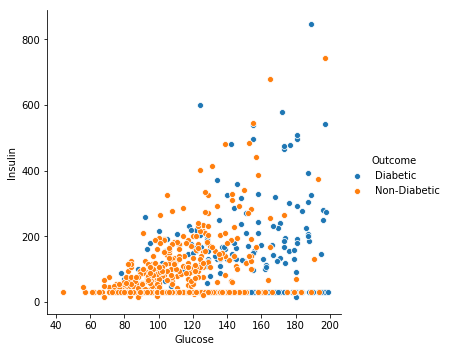

In [23]:
sns.pairplot(data=data_copy, x_vars='Glucose', y_vars='Insulin',hue='Outcome', height=5)

##### from the plot above it is obvious that:
- Most persons with glucose level below 1140 are not likely to have diabetes
- Those with high glucose level from 150 above and low insulin level are more likely to have daibetes
- therefore the higher the glucose level and the lower the insulin level the more likely it is for a patient to have diabetes

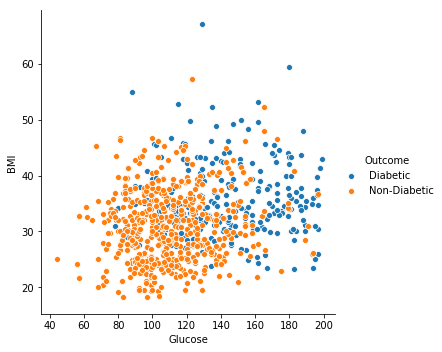

In [24]:
sns.pairplot(data=data_copy, x_vars='Glucose', y_vars='BMI',hue='Outcome', height=5)

- it is obvious that patients with BMI above 30 and glucose level above 140 are more to have diabetes
- it is therefore reasonable to say that the higher the BMI of a patient and the higher his/her glucose level the more likely they are to have diabetes

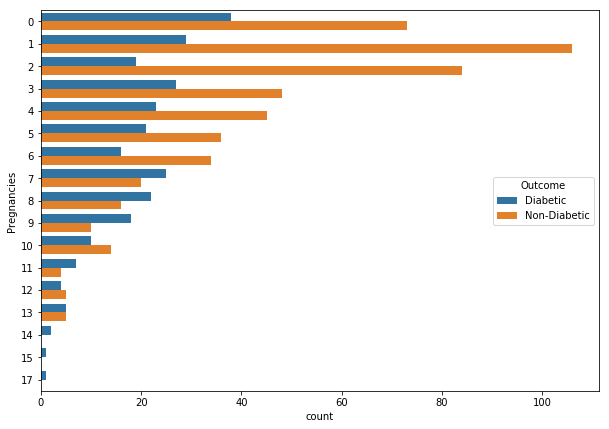

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(data=data_copy, hue='Outcome', y='Pregnancies')
plt.show()

- The plot shows that the lower the number of pregnancies the less likely it is to have diabetes 
- The higher the number of pregnancies the more likely it is to have diabetes

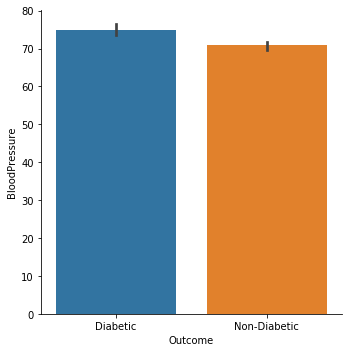

In [45]:
sns.catplot(data=data_copy, y='BloodPressure', x='Outcome', kind='bar')

#### Blood pressure alone really does not contribute to diabetes

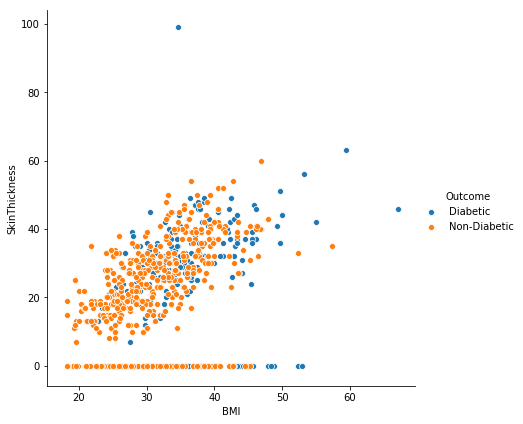

In [59]:
sns.pairplot(data=data_copy, y_vars='SkinThickness',x_vars= 'BMI',hue ='Outcome', height=6)

- Skin thickness and BMI have a positive linear relationship 
- The lower the thickness and the BMI the less likely it is to have Diabetes and vice versa

In [ ]:
data_copy.to_csv('cleaned_data.csv', index=False)